In [1]:
import nltk
from nltk.translate.bleu_score import sentence_bleu, corpus_bleu, modified_precision
from nltk.translate.chrf_score import sentence_chrf, corpus_chrf
from nltk.metrics import scores
import scipy.io.wavfile
from IPython.display import Audio
from IPython.display import display
from nltk.stem import *
# from nltk.stem.snowball import SnowballStemmer
from stemming.porter2 import stem
import stemming
from nltk.metrics.scores import recall

from nltk.corpus import stopwords

%matplotlib inline

In [2]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)

In [3]:
smooth_fun = nltk.translate.bleu_score.SmoothingFunction()

In [4]:
from nmt_run import *

fisher + callhome sp/es - en configuration
--------------------------------------------------
loading info_dict from=./both_fbank_out/info.dict


 30%|███       | 42136/138708 [00:00<00:00, 421358.39it/s]

--------------------------------------------------
creating buckets for: fisher_dev
creating buckets for key: sp
creating buckets for: fisher_dev2
creating buckets for key: sp
creating buckets for: fisher_test
creating buckets for key: sp
creating buckets for: fisher_train
creating buckets for key: sp


100%|██████████| 14284/14284 [00:00<00:00, 379645.26it/s]


creating buckets for: callhome_devtest
creating buckets for key: sp
creating buckets for: callhome_evltest
creating buckets for key: sp
creating buckets for: callhome_train
creating buckets for key: sp
--------------------------------------------------
saving info dict in: ./both_fbank_out/buckets_sp.dict
all done ...
--------------------------------------------------
showing buckets for category: fisher_dev
number of buckets=15, width of each bucket=128
index | width | num   
    0 |     0 |    808
    1 |   128 |    996
    2 |   256 |    627
    3 |   384 |    420
    4 |   512 |    298
    5 |   640 |    261
    6 |   768 |    200
    7 |   896 |    148
    8 |  1024 |    107
    9 |  1152 |     51
   10 |  1280 |     40
   11 |  1408 |     13
   12 |  1536 |      5
   13 |  1664 |      1
   14 |  1792 |      2
--------------------------------------------------
showing buckets for category: fisher_dev2
number of buckets=15, width of each bucket=128
index | width | num   
    0 |   

/afs/inf.ed.ac.uk/group/project/lowres/work/anaconda3/envs/chainer3/lib/python3.6/site-packages/chainer/utils/experimental.py:104: FutureWarning: chainer.links.normalization.layer_normalization.py is experimental. The interface can change in the future.
  FutureWarning)


using ADAM optimizer


In [5]:
model_files = [f for f in os.listdir(os.path.dirname(model_fil))
                   if os.path.basename(model_fil).replace('.model','') in f]
# print(model_files)

In [6]:
max_model_fil = max(model_files, key=lambda s: int(s.split('_')[-1].split('.')[0]))

In [7]:
max_model_fil

'seq2seq_sen-138819_hwy0-dec3_emb-128-h-300__fsh_100__sp_en_w_gru_drpt-0.3_noise-0_l2-0.000100_32_32_2_3_2DCNN_BN_LN_enc-3_199.model'

In [8]:
last_epoch = check_model()

--------------------------------------------------------------------------------
model found = 
nov10/seq2seq_sen-138819_hwy0-dec3_emb-128-h-300__fsh_100__sp_en_w_gru_drpt-0.3_noise-0_l2-0.000100_32_32_2_3_2DCNN_BN_LN_enc-3_199.model
loading ...
finished loading ..


In [9]:
log_dev_fil_name

'nov10/dev_sen-138819_hwy0-dec3_emb-128-h-300__fsh_100__sp_en_w_gru_drpt-0.3_noise-0_l2-0.000100_32_32_2_3_2DCNN_BN_LN_enc-3.log'

In [10]:
log_train = np.loadtxt(log_train_fil_name, delimiter=',', skiprows=False).transpose()
log_test = np.genfromtxt(log_dev_fil_name, delimiter=',', usecols = (0,1,2)).transpose()

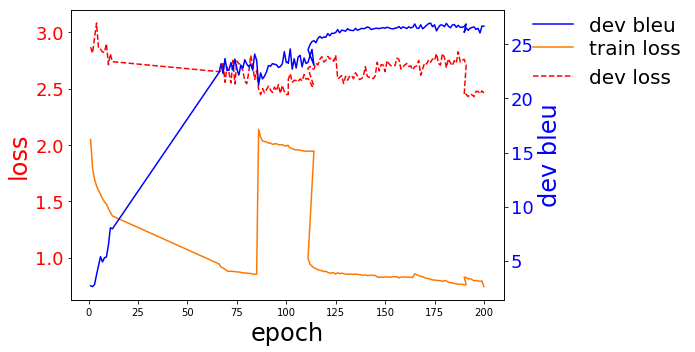

In [11]:
fig, ax1 = plt.subplots()
fig.set_size_inches(8,5)
ax1.plot(log_train[0], log_train[1], color='#ff7700')
ax1.plot(log_test[0], log_test[1], 'r--')
ax1.set_xlabel('epoch', size=24)
ax1.set_ylabel('loss', color='r', size=24)
for tl in ax1.get_yticklabels():
    tl.set_color('r')
    tl.set_fontsize(18)
plt.legend(['train loss', 'dev loss'], bbox_to_anchor=(1.45, 0.96), framealpha=0, fontsize=20)    
ax2 = ax1.twinx()
ax2.plot(log_test[0], log_test[2]*100, 'b-')
ax2.set_xlabel('iteration')
ax2.set_ylabel('dev bleu', color='b', size=24)
# ax1.set_xlim(0, 60)
for tl in ax2.get_yticklabels():
    tl.set_color('b')
    tl.set_fontsize(18) 
plt.legend(['dev bleu'], bbox_to_anchor=(1.44, 1.04), framealpha=0, fontsize=20)
# plt.legend(['dev bleu'], bbox_to_anchor=(1.06, 0.9), framealpha=0, fontsize=20)
plt.grid(False)
plt.tight_layout()

In [12]:
import nltk.translate.bleu_score

In [13]:
def play_utt(utt, m_dict):
    sr, y = scipy.io.wavfile.read(os.path.join(wavs_path, utt.rsplit("-",1)[0]+'.wav'))
    start_t = min(seg['start'] for seg in m_dict[utt]['seg'])
    end_t = max(seg['end'] for seg in m_dict[utt]['seg'])
    print(start_t, end_t)
    start_t_samples, end_t_samples = int(start_t*sr), int(end_t*sr)
    display(Audio(y[start_t_samples:end_t_samples], rate=sr))

In [14]:
def display_words(m_dict, v_dict, preds, utts, dec_key, key, play_audio=False, displayN=-1):
    if displayN == -1:
        displayN = len(utts)
    es_ref = []
    en_ref = []
    for u in utts:
        es_ref.append(" ".join([w.decode() for w in m_dict[u]['es_w']]))
        if type(m_dict[u][dec_key]) == list:
            en_ref.append(" ".join([w.decode() for w in m_dict[u]['en_w']]))
        else:
            en_ref.append(" ".join([w.decode() for w in m_dict[u]['en_w'][0]]))

    en_pred = []
    join_str = ' ' if dec_key.endswith('_w') else ''

    for p in preds:
        t_str = join_str.join([v_dict['i2w'][i].decode() for i in p])
        t_str = t_str[:t_str.find('_EOS')]
        en_pred.append(t_str)

    for u, es, en, p in sorted(list(zip(utts, es_ref, en_ref, en_pred)))[:displayN]:
        # for reference, 1st word is GO_ID, no need to display
        print("Utterance: {0:s}".format(u))
        display_pp = PrettyTable(["cat","sent"], hrules=True)
        display_pp.align = "l"
        display_pp.header = False
        display_pp.add_row(["es ref", textwrap.fill(es,50)])
        display_pp.add_row(["en ref", textwrap.fill(en,50)])
        display_pp.add_row(["en pred", textwrap.fill(p,50)])

        print(display_pp)
        if play_audio:
            play_utt(u, m_dict)
    

In [15]:
def display_words_latex(m_dict, v_dict, preds, utts, dec_key):
    print("min length={0:d}, max length={1:d}".format(min_len, max_len))
    es_ref = []
    en_ref = []
    for u in utts:
        es_ref.append(" ".join([w.decode() for w in m_dict[u]['es_w']]))
        if type(m_dict[u][dec_key]) == list:
            en_ref.append(" ".join([w.decode() for w in m_dict[u]['en_w']]))
        else:
            en_ref.append(" ".join([w.decode() for w in m_dict[u]['en_w'][0]]))

    en_pred = []
    join_str = ' ' if dec_key.endswith('_w') else ''

    for p in preds:
        t_str = join_str.join([v_dict['i2w'][i].decode() for i in p])
        t_str = t_str[:t_str.find('_EOS')]
        en_pred.append(t_str)

    total_matching_len = 0

    for u, es, en, p in zip(utts, es_ref, en_ref, en_pred):
        # for reference, 1st word is GO_ID, no need to display
        print("Utterance: {0:s}".format(u))
        print("{0:d} & {1:s} & {2:s} & {3:s} \\\\".format(total_matching_len, es, en, p))



In [16]:
def write_predictions_to_file(m_dict, v_dict, preds, utts, dec_key, key, stemmify=False):
    en_hyp = []
    en_ref = []
    ref_key = 'en_w' if 'en_' in dec_key else 'es_w'
    src_key = 'es_w'
    
    for u in tqdm(utts, ncols=80):
        if type(m_dict[u][ref_key]) == list:
            if stemmify:
                en_ref.append(" ".join([stem(w.decode()) for w in m_dict[u]['en_w']]))
            else:
                en_ref.append(" ".join([w.decode() for w in m_dict[u]['en_w']]))
        else:
            en_r_list = []
            for r in m_dict[u][ref_key]:
                if stemmify:
                    en_r_list.append(" ".join([stem(w.decode()) for w in r]))
                else:
                    en_r_list.append(" ".join([w.decode() for w in r]))
            en_ref.append(en_r_list)

    join_str = ' ' if dec_key.endswith('_w') else ''

    total_matching_len = 0

    for u, p in zip(utts, preds):
        if stemmify:
            t_str = join_str.join([stem(v_dict['i2w'][i].decode()) if i != EOS_ID else EOS.decode() for i in p])
        else:
            t_str = join_str.join([v_dict['i2w'][i].decode() for i in p])
        t_str = t_str[:t_str.find('_EOS')]
        en_hyp.append(t_str)

    
    print("writing to file: {0:s}".format("{0:s}_mt-output".format(key)))
    with open("{0:s}_mt-output".format(key), "w") as pred_f:
        for p in en_hyp:
            pred_f.write("{0:s}\n".format(p))
        # end for
    # end while
    
    if type(m_dict[utts[0]][ref_key]) == list:
        with open("{0:s}.ref0".format(key), "w") as ref_f:
            for r in en_ref:
                ref_f.write("{0:s}\n".format(r))
    else:
        num_ref = len(m_dict[u][ref_key])
        for i in range(num_ref):
            with open("{0:s}_en.ref{1:d}".format(key,i), "w") as ref_f:
                for r in en_ref:
                    ref_f.write("{0:s}\n".format(r[i]))
                # end for each utt
            # end with
        # end for reference
    # end else
    print("done")
    return en_ref, en_hyp

### Fisher dev

In [17]:
key='fisher_dev'
train=False
m_dict = map_dict[key]
v_dict = vocab_dict[dec_key]
n=len(map_dict[key])
BATCH_SIZE = 512

In [18]:
vocab_dict.keys()

dict_keys(['es_w', 'es_c', 'en_w', 'en_c'])

In [19]:
cat_speech_path = os.path.join(out_path, key)
wavs_path = os.path.join(out_path, "wavs")

In [20]:
random.seed("meh")
# random.seed("haha")

In [21]:
print("-"*80)
print("EPOCH = {0:d}".format(last_epoch+1))
fsh_pred_sents, fsh_utts, loss = feed_model(map_dict[key],
                  b_dict=bucket_dict[key],
                  vocab_dict=vocab_dict,
                  batch_size=BATCH_SIZE,
                  x_key=enc_key,
                  y_key=dec_key,
                  train=train,
                  cat_speech_path=cat_speech_path, use_y=False, mini=False)

print("{0:s} {1:s} mean loss={2:.4f}".format("*" * 10,
                                    "train" if train else "dev",
                                    loss))
print("-")
print("-"*80)

  0%|                                                  | 0/3977 [00:00<?, ?it/s]

--------------------------------------------------------------------------------
EPOCH = 200


b=3,l=0.00,avg=0.00: 100%|██████████████████| 3977/3977 [02:25<00:00, 11.26it/s]

********** dev mean loss=0.0000
-
--------------------------------------------------------------------------------


In [22]:
# Eval parameters
ref_index = -1
min_len, max_len= 0, MAX_EN_LEN
# min_len, max_len = 0, 5
displayN = 50

In [23]:
fsh_filt_pred, fsh_filt_utts = zip(*sorted([(p,u) for p, u in zip(fsh_pred_sents, fsh_utts) if (len(m_dict[u]['es_w']) >= min_len) and 
                                        (len(m_dict[u]['es_w']) <= max_len)]))

In [24]:
print("length filtered utterances = {0:d}".format(len(fsh_filt_utts)))

length filtered utterances = 3977


In [25]:
display_words(m_dict, v_dict, fsh_filt_pred, fsh_filt_utts, dec_key, key, play_audio=True, displayN=displayN)

Utterance: 20051009_182032_217_fsp-A-1
+---------+----------------+
| es ref  | buenas tardes  |
+---------+----------------+
| en ref  | good afternoon |
+---------+----------------+
| en pred | good afternoon |
+---------+----------------+
0.71 1.92


Utterance: 20051009_182032_217_fsp-A-10
+---------+----------------------------------------------------+
| es ref  | sí ¿cómo se llama usted otra vez se me olvidó      |
|         | carmen                                             |
+---------+----------------------------------------------------+
| en ref  | yes what was your name again i forgot i ' m carmen |
+---------+----------------------------------------------------+
| en pred | yes but what ' s your name again again             |
+---------+----------------------------------------------------+
32.55 36.65


Utterance: 20051009_182032_217_fsp-A-100
+---------+-----------------------------------------------+
| es ref  | entonces en esa andamos por acá estoy         |
+---------+-----------------------------------------------+
| en ref  | then that ' s where we ' re at over here i am |
+---------+-----------------------------------------------+
| en pred | then i ' m starting over here here i ' m      |
+---------+-----------------------------------------------+
438.25 441.23


Utterance: 20051009_182032_217_fsp-A-101
+---------+--------------------------------------------------+
| es ref  | trabajando como profesor auxiliar de profesor de |
|         | español                                          |
+---------+--------------------------------------------------+
| en ref  | working as a teacher spanish teacher assistant   |
+---------+--------------------------------------------------+
| en pred | working as teacher or something like that in     |
|         | spanish                                          |
+---------+--------------------------------------------------+
441.23 444.62


Utterance: 20051009_182032_217_fsp-A-102
+---------+----------------------------------------------------+
| es ref  | pero también viendo a ver que posibilidades hay de |
|         | ir a la escuela hacer una maestría                 |
+---------+----------------------------------------------------+
| en ref  | but i ' m also looking at what are the chances of  |
|         | going to school to get a masters                   |
+---------+----------------------------------------------------+
| en pred | but also watching what possibility there are going |
|         | to be the school where it ' s too cold             |
+---------+----------------------------------------------------+
444.67 448.81


Utterance: 20051009_182032_217_fsp-A-103
+---------+----------------------------------------------------+
| es ref  | sí o o tratar de buscar porque bueno en casa       |
|         | también se puede vivir y todo pero                 |
+---------+----------------------------------------------------+
| en ref  | yes or or trying to find because well you can live |
|         | at home and everything but                         |
+---------+----------------------------------------------------+
| en pred | yes or later late because well in a case also you  |
|         | can live and everything but                        |
+---------+----------------------------------------------------+
449.57 454.88


Utterance: 20051009_182032_217_fsp-A-104
+---------+----------------------------------------------------+
| es ref  | bueno si se puede aprovechar aquí no está mal      |
+---------+----------------------------------------------------+
| en ref  | well if you can take advantage here it ' s not bad |
+---------+----------------------------------------------------+
| en pred | well i don ' t know if you can check it here it '  |
|         | s bad bad                                          |
+---------+----------------------------------------------------+
454.88 457.56


Utterance: 20051009_182032_217_fsp-A-105
+---------+-------+
| es ref  | mhm   |
+---------+-------+
| en ref  | uh um |
+---------+-------+
| en pred | mhm   |
+---------+-------+
460.79 462.01


Utterance: 20051009_182032_217_fsp-A-106
+---------+-----------------+
| es ref  | sí señora       |
+---------+-----------------+
| en ref  | yes madam       |
+---------+-----------------+
| en pred | and they say no |
+---------+-----------------+
463.67 464.89


Utterance: 20051009_182032_217_fsp-A-107
+---------+-------+
| es ref  | mhm   |
+---------+-------+
| en ref  | uh um |
+---------+-------+
| en pred | mm    |
+---------+-------+
467.77 469.13


Utterance: 20051009_182032_217_fsp-A-108
+---------+-------------+
| es ref  | mhm ajá     |
+---------+-------------+
| en ref  | uh um right |
+---------+-------------+
| en pred | mhm oh      |
+---------+-------------+
473.48 476.87


Utterance: 20051009_182032_217_fsp-A-109
+---------+-------+
| es ref  | sí    |
+---------+-------+
| en ref  | right |
+---------+-------+
| en pred | yes   |
+---------+-------+
480.91 481.57


Utterance: 20051009_182032_217_fsp-A-11
+---------+-----------+
| es ref  | bueno     |
+---------+-----------+
| en ref  | hi        |
+---------+-----------+
| en pred | very good |
+---------+-----------+
36.9 38.26


Utterance: 20051009_182032_217_fsp-A-110
+---------+--------+
| es ref  | ah sí  |
+---------+--------+
| en ref  | ah yes |
+---------+--------+
| en pred | oh yes |
+---------+--------+
481.72 485.31


Utterance: 20051009_182032_217_fsp-A-111
+---------+---------+
| es ref  | sí sí   |
+---------+---------+
| en ref  | yes yes |
+---------+---------+
| en pred | yes yes |
+---------+---------+
486.22 490.16


Utterance: 20051009_182032_217_fsp-A-112
+---------+-----+
| es ref  | mhm |
+---------+-----+
| en ref  | mmh |
+---------+-----+
| en pred | mhm |
+---------+-----+
498.25 499.21


Utterance: 20051009_182032_217_fsp-A-113
+---------+----------------------------------------------------+
| es ref  | ah que bueno y entonces ¿sus eh sus hermanos están |
|         | en puerto rico                                     |
+---------+----------------------------------------------------+
| en ref  | ah that ' s great and then your eh your siblings   |
|         | are in puerto rico                                 |
+---------+----------------------------------------------------+
| en pred | ah but how nice and then you are in puerto rico    |
+---------+----------------------------------------------------+
501.53 507.65


Utterance: 20051009_182032_217_fsp-A-114
+---------+---------------------------------------+
| es ref  | ah ¿y usted como se vino primero      |
+---------+---------------------------------------+
| en ref  | ah and how did you come here first    |
+---------+---------------------------------------+
| en pred | ah and how did you get to first first |
+---------+---------------------------------------+
508.0 510.83


Utterance: 20051009_182032_217_fsp-A-115
+---------+----------------------------------+
| es ref  | ¿se vino a v a pasear acá        |
+---------+----------------------------------+
| en ref  | did you come to on vacation here |
+---------+----------------------------------+
| en pred | i forgot                         |
+---------+----------------------------------+
511.29 513.56


Utterance: 20051009_182032_217_fsp-A-116
+---------+-----+
| es ref  | ajá |
+---------+-----+
| en ref  | aha |
+---------+-----+
| en pred | aha |
+---------+-----+
518.11 519.07


Utterance: 20051009_182032_217_fsp-A-117
+---------+-----+
| es ref  | sí  |
+---------+-----+
| en ref  | yes |
+---------+-----+
| en pred | yes |
+---------+-----+
523.93 525.09


Utterance: 20051009_182032_217_fsp-A-118
+---------+-----+
| es ref  | mhm |
+---------+-----+
| en ref  | mmh |
+---------+-----+
| en pred | mhm |
+---------+-----+
526.66 527.72


Utterance: 20051009_182032_217_fsp-A-119
+---------+---------+
| es ref  | sí ajá  |
+---------+---------+
| en ref  | yes aha |
+---------+---------+
| en pred | yes aha |
+---------+---------+
529.64 534.59


Utterance: 20051009_182032_217_fsp-A-12
+---------+---------------+
| es ref  | sí señora     |
+---------+---------------+
| en ref  | yes ma ' am   |
+---------+---------------+
| en pred | yes she ' s a |
+---------+---------------+
39.28 40.39


Utterance: 20051009_182032_217_fsp-A-120
+---------+------------------------------------------------+
| es ref  | sí eh sí he escuchado que es bien frío chicago |
+---------+------------------------------------------------+
| en ref  | yes eh yes i have heard that chicago is pretty |
|         | cold                                           |
+---------+------------------------------------------------+
| en pred | yes yes i ' ve heard that how cold is chicago  |
+---------+------------------------------------------------+
537.73 540.86


Utterance: 20051009_182032_217_fsp-A-121
+---------+-----+
| es ref  | sí  |
+---------+-----+
| en ref  | yes |
+---------+-----+
| en pred | yes |
+---------+-----+
548.95 549.71


Utterance: 20051009_182032_217_fsp-A-122
+---------+---------------------------------------------------+
| es ref  | claro ay que b ¿y entonces su mamá está en puerto |
|         | rico ahora                                        |
+---------+---------------------------------------------------+
| en ref  | clearly and so her mom is in puerto rico now      |
+---------+---------------------------------------------------+
| en pred | ah ah what and so so your mom is in puerto rico   |
|         | now                                               |
+---------+---------------------------------------------------+
549.96 555.57


Utterance: 20051009_182032_217_fsp-A-123
+---------+--------------+
| es ref  | ay que bueno |
+---------+--------------+
| en ref  | great        |
+---------+--------------+
| en pred | ah how nice  |
+---------+--------------+
556.28 557.79


Utterance: 20051009_182032_217_fsp-A-124
+---------+-----+
| es ref  | sí  |
+---------+-----+
| en ref  | yes |
+---------+-----+
| en pred | yes |
+---------+-----+
559.87 560.88


Utterance: 20051009_182032_217_fsp-A-125
+---------+---------+
| es ref  | sí ajá  |
+---------+---------+
| en ref  | yes mhm |
+---------+---------+
| en pred | yes aha |
+---------+---------+
565.12 568.31


Utterance: 20051009_182032_217_fsp-A-126
+---------+---------+
| es ref  | sí mhm  |
+---------+---------+
| en ref  | yes mhm |
+---------+---------+
| en pred | yes mm  |
+---------+---------+
570.43 575.38


Utterance: 20051009_182032_217_fsp-A-127
+---------+----+
| es ref  | mm |
+---------+----+
| en ref  | mm |
+---------+----+
| en pred | oh |
+---------+----+
583.02 584.13


Utterance: 20051009_182032_217_fsp-A-128
+---------+-----+
| es ref  | mhm |
+---------+-----+
| en ref  | mhm |
+---------+-----+
| en pred | a   |
+---------+-----+
587.26 588.53


Utterance: 20051009_182032_217_fsp-A-129
+---------+-----+
| es ref  | sí  |
+---------+-----+
| en ref  | yes |
+---------+-----+
| en pred | yes |
+---------+-----+
589.84 590.7


Utterance: 20051009_182032_217_fsp-A-13
+---------+-------------------------------------------------+
| es ref  | sí ¿y usted hace mucho tiempo que que vive aquí |
+---------+-------------------------------------------------+
| en ref  | yes and have you been living here a long time   |
+---------+-------------------------------------------------+
| en pred | yes you ' ve been here a long time ago          |
+---------+-------------------------------------------------+
40.94 44.03


Utterance: 20051009_182032_217_fsp-A-130
+---------+-------+
| es ref  | mm oh |
+---------+-------+
| en ref  | mh oh |
+---------+-------+
| en pred | oh oh |
+---------+-------+
592.62 597.32


Utterance: 20051009_182032_217_fsp-A-131
+---------+-----+
| es ref  | sí  |
+---------+-----+
| en ref  | yes |
+---------+-----+
| en pred | yes |
+---------+-----+
598.89 599.6


Utterance: 20051009_182032_217_fsp-A-132
+---------+--------------------------------------------+
| es ref  | es él es el herma él es hermano de su      |
+---------+--------------------------------------------+
| en ref  | is he is the brother he is brother of your |
+---------+--------------------------------------------+
| en pred | he he ' s from the human beings            |
+---------+--------------------------------------------+
599.75 603.54


Utterance: 20051009_182032_217_fsp-A-133
+---------+--------------+
| es ref  | mamá ¿verdad |
+---------+--------------+
| en ref  | mother right |
+---------+--------------+
| en pred | manuel       |
+---------+--------------+
603.64 604.5


Utterance: 20051009_182032_217_fsp-A-134
+---------+---------------+
| es ref  | mm sí sí      |
+---------+---------------+
| en ref  | mm yes yes    |
+---------+---------------+
| en pred | um yes yes in |
+---------+---------------+
604.75 611.37


Utterance: 20051009_182032_217_fsp-A-135
+---------+-----+
| es ref  | sí  |
+---------+-----+
| en ref  | yes |
+---------+-----+
| en pred | yes |
+---------+-----+
617.89 619.06


Utterance: 20051009_182032_217_fsp-A-136
+---------+-----+
| es ref  | sí  |
+---------+-----+
| en ref  | yes |
+---------+-----+
| en pred | yes |
+---------+-----+
622.44 623.2


Utterance: 20051009_182032_217_fsp-A-137
+---------+-----+
| es ref  | mhm |
+---------+-----+
| en ref  | mhm |
+---------+-----+
| en pred | uh  |
+---------+-----+
626.03 627.9


Utterance: 20051009_182032_217_fsp-A-138
+---------+-----------+
| es ref  | ah mm mhm |
+---------+-----------+
| en ref  | ah mh mhm |
+---------+-----------+
| en pred | ah mm mm  |
+---------+-----------+
628.56 635.94


Utterance: 20051009_182032_217_fsp-A-139
+---------+--------------------------------+
| es ref  | claro sí señora                |
+---------+--------------------------------+
| en ref  | of courses madam               |
+---------+--------------------------------+
| en pred | wow yes yes i ' m calling from |
+---------+--------------------------------+
644.13 646.2


Utterance: 20051009_182032_217_fsp-A-14
+---------+-----+
| es ref  | ¿si |
+---------+-----+
| en ref  | yes |
+---------+-----+
| en pred | yes |
+---------+-----+
44.73 45.34


Utterance: 20051009_182032_217_fsp-A-140
+---------+-----+
| es ref  | sí  |
+---------+-----+
| en ref  | yes |
+---------+-----+
| en pred | yes |
+---------+-----+
648.63 649.64


Utterance: 20051009_182032_217_fsp-A-141
+---------+-----+
| es ref  | mhm |
+---------+-----+
| en ref  | hmm |
+---------+-----+
| en pred | mm  |
+---------+-----+
653.83 654.69


Utterance: 20051009_182032_217_fsp-A-142
+---------+-----+
| es ref  | wow |
+---------+-----+
| en ref  | wow |
+---------+-----+
| en pred | wow |
+---------+-----+
658.33 659.34


Utterance: 20051009_182032_217_fsp-A-143
+---------+-----------------+
| es ref  | sí sí señora    |
+---------+-----------------+
| en ref  | yes yes ma ' am |
+---------+-----------------+
| en pred | yes yes yes i   |
+---------+-----------------+
659.75 663.24


In [26]:
es_ref = []
en_ref = []
for u in fsh_filt_utts:
    es_ref.append(" ".join([w.decode() for w in m_dict[u]['es_w']]))
    if type(m_dict[u][dec_key]) == list:
        en_ref.append(" ".join([w.decode() for w in m_dict[u]['en_w']]))
    else:
        en_ref.append(" ".join([w.decode() for w in m_dict[u]['en_w'][0]]))

en_pred = []
join_str = ' ' if dec_key.endswith('_w') else ''

In [27]:
os.chdir("..")
os.chdir("/afs/inf.ed.ac.uk/group/project/lowres/work/chainer2/speech2text")

In [28]:
b, chrf, h, r = calc_bleu(m_dict, 
                          v_dict, 
                          fsh_filt_pred, 
                          fsh_filt_utts, 
                          dec_key, 
                          ref_index=ref_index)

print("BLEU score on: {0:s} = {1:.2f}".format(key, b * 100))
print("-"*60)

model_refs = {u: mr for u, mr in zip(fsh_filt_utts, r)}
model_hyps = {u: mh for u, mh in zip(fsh_filt_utts, h)}

all_weights=[(1.,0.,0.,0.),
             (0.,1.,0.,0.),
             (0.,0.,1.,0.),
             (0.,0.,0.,1.),
             (1./2,1./2,0.,0.),
             (1./3,1./3,1./3,0.),
             (.25,.25,.25,.25)]

100%|████████████████████████████████████| 3977/3977 [00:00<00:00, 44308.07it/s]


BLEU score on: fisher_dev = 26.50
------------------------------------------------------------


In [29]:
key

'fisher_dev'

In [30]:
en_ref, en_hyp = write_predictions_to_file(m_dict, v_dict, fsh_filt_pred, fsh_filt_utts, 
                                           dec_key, key, stemmify=False)

100%|████████████████████████████████████| 3977/3977 [00:00<00:00, 43649.85it/s]


writing to file: fisher_dev_mt-output
done


In [31]:
len(en_hyp)

3977

In [32]:
_, _ = corpus_precision_recall(r, h)

total utts=3977
metric     |   1-gram |   2-gram|   3-gram |   4-gram
------------------------------------------------------
precision  |    60.30 |    33.85|    20.07 |    12.03
recall     |    35.15 |    14.78|     7.52 |     4.11


### Callhome dev

In [33]:
def compute_callhome_metrics():
    key='callhome_devtest'
    train=False
    m_dict = map_dict[key]
    v_dict = vocab_dict[dec_key]
    n=len(map_dict[key])
    BATCH_SIZE = 256

    cat_speech_path = os.path.join(out_path, key)

    print("-"*80)
    print("EPOCH = {0:d}".format(last_epoch+1))
    call_pred_sents, call_utts, loss = feed_model(map_dict[key],
                      b_dict=bucket_dict[key],
                      vocab_dict=vocab_dict,
                      batch_size=BATCH_SIZE,
                      x_key=enc_key,
                      y_key=dec_key,
                      train=train,
                      cat_speech_path=cat_speech_path, use_y=True)

    print("{0:s} {1:s} mean loss={2:.4f}".format("*" * 10,
                                        "train" if train else "dev",
                                        loss))
    print("-")
    print("-"*80)

    display_words(m_dict, v_dict, call_pred_sents[:displayN], call_utts[:displayN],
                  dec_key, key, min_len=min_len, max_len=max_len, play_audio=False)

    b, _, h, r = calc_bleu(m_dict, 
                                  v_dict, 
                                  call_pred_sents, 
                                  call_utts, 
                                  dec_key, 
                                  min_len=min_len, 
                                  max_len=max_len, 
                                  ref_index=ref_index)

    print("BLEU score on: {0:s} = {1:.2f}".format(key, b * 100))
    print("-"*60)

    all_weights=[(1.,0.,0.,0.),
                 (0.,1.,0.,0.),
                 (0.,0.,1.,0.),
                 (0.,0.,0.,1.),
                 (1./2,1./2,0.,0.),
                 (1./3,1./3,1./3,0.),
                 (.25,.25,.25,.25)]

    print("{0:>20s} | {1:20s}".format("bleu score (0-100)", "uni-bi-tri-quad"))
    for weights in all_weights:
        b = corpus_bleu(r, h, weights=weights, smoothing_function=smooth_fun.method2)
        print("{0:20.2f} | {1:20s}".format(b * 100, "-".join(map("{0:.2f}".format, weights))))

    _, _ = corpus_precision_recall(r, h)

    call_en_ref, call_en_hyp = write_predictions_to_file(m_dict, v_dict, call_pred_sents, call_utts, 
                                                         dec_key, key, min_len=min_len, max_len=max_len, stemmify=False)

    print(len(call_en_ref),len(call_en_hyp))

### Google metrics

In [34]:
google_s2t_path_hyps = "./google-s2t/e2e_ast_decode/hyps/fisher_dev/"
google_s2t_path_refs = "./google-s2t/e2e_ast_decode/refs/fisher_dev/"
google_hyp_fname = 'fisher_spa_eng_ast_003_base_r0.txt'

### Prep Google data

In [35]:
kaldi_segment_map_path = os.path.join(out_path,'kaldi_segment_map.dict')
rev_map_dict_path = os.path.join(out_path,'rev_map.dict')
kaldi_segment_map = pickle.load(open(kaldi_segment_map_path, "rb"))
rev_map_dict = pickle.load(open(rev_map_dict_path, "rb"))


google_s2t_path_mapping = "./google-s2t/e2e_ast_decode/mapping/fisher_dev/"
google_s2t_ref0 = os.path.join(google_s2t_path_mapping, "sorted-normalized-fisher_dev.en.0.mapping")

google_s2t_map_path = os.path.join(out_path, "google_s2t_map.dict")
google_s2t_rev_map_path = os.path.join(out_path, "google_s2t_rev_map.dict")
google_s2t_refs_path = os.path.join(out_path, "google_s2t_refs.dict")
google_s2t_hyps_path = os.path.join(out_path, "google_s2t_hyps.dict")

In [36]:
def prep_google_data():

    google_s2t_map = {}
    google_s2t_rev_map = {}

    r_m_dict = rev_map_dict['fisher_dev']
    with open(google_s2t_ref0, "r") as in_f:
        for i, line in enumerate(in_f, start=1):
            wav_f = line.split(".wav")[0].replace("fisher_dev/", "")
            key_1 = wav_f[:wav_f.find("_fsp")+len("_fsp")]
            key_2 = wav_f.rsplit("_fsp",1)[1].split("_")[0]
            google_s2t_map[i] = r_m_dict[key_1+key_2]
            google_s2t_rev_map[r_m_dict[key_1+key_2]] = i
        # end for
    # end with
    pickle.dump(google_s2t_map, open(google_s2t_map_path, "wb"))
    pickle.dump(google_s2t_rev_map, open(google_s2t_rev_map_path, "wb"))
    
    google_s2t_refs = {}
    for fname in os.listdir(google_s2t_path_refs):
        with open(os.path.join(google_s2t_path_refs,fname), "r") as in_f:
            f_key = fname.rsplit("-",1)[-1].replace(".en.","_ref_")
            google_s2t_refs[f_key] = {}
            for i, line in enumerate(in_f, start=1):
                utt_key = google_s2t_map[i]
                google_s2t_refs[f_key][utt_key] = line.rstrip('\n').split()
            # end for
        # end with
    # end for
    pickle.dump(google_s2t_refs, open(google_s2t_refs_path, "wb"))
    
    google_s2t_hyps = {}
    for fname in os.listdir(google_s2t_path_hyps):
        with open(os.path.join(google_s2t_path_hyps,fname), "r") as in_f:
            f_key = "fisher_dev_{0:s}".format(fname.rsplit("_")[-1].replace(".txt", ""))
            google_s2t_hyps[f_key] = {}
            for i, line in enumerate(in_f, start=1):
                utt_key = google_s2t_map[i]
                google_s2t_hyps[f_key][utt_key] = line.rstrip('\n').split()
            # end for
        # end with
    # end for
    pickle.dump(google_s2t_hyps, open(google_s2t_hyps_path, "wb"))
    return google_s2t_refs, google_s2t_hyps

In [37]:
"." in fsh_utts

False

In [38]:
def write_google_s2t_refs_to_file(google_dict, utts):
    data_lines = {}
    for r in google_dict.keys():
        curr_file_lines = []
        out_fname = "google_"+r+".en"
        with open(out_fname, "w") as out_f:
            print("writing to file: {0:s}".format(out_fname))
            for utt_id in utts:
                words = " ".join(google_dict[r][utt_id])
                out_line = "{0:s}\n".format(words)
                out_f.write(out_line)
                if utt_id not in data_lines:
                    if len(google_dict) > 1:
                        data_lines[utt_id] = [google_dict[r][utt_id]]
                    else:
                        data_lines[utt_id] = google_dict[r][utt_id][:]
                else:
                    data_lines[utt_id].append(google_dict[r][utt_id])
            # end for over utterances
        # end for file        
    # end with
    return data_lines

In [39]:
google_s2t_refs, google_s2t_hyps = prep_google_data()

In [40]:
hyp_key = 'fisher_dev_r0'
google_refs = write_google_s2t_refs_to_file(google_s2t_refs, fsh_filt_utts)
google_hyps = write_google_s2t_refs_to_file({hyp_key : google_s2t_hyps[hyp_key]}, fsh_filt_utts)

writing to file: google_fisher_dev_ref_3.en
writing to file: google_fisher_dev_ref_2.en
writing to file: google_fisher_dev_ref_1.en
writing to file: google_fisher_dev_ref_0.en
writing to file: google_fisher_dev_r0.en


In [41]:
" ".join(map(lambda t: t.decode(), m_dict[rev_map_dict['fisher_dev']['20051009_182032_217_fsp.108']]['en_w'][0]))

"and my dad always taught us that that for you to be to believe in god you don ' t have to be involved with a church"

In [42]:
print(" ".join([w for w in google_s2t_refs['fisher_dev_ref_0'][fsh_utts[0]]]))
print(" ".join([w for w in google_s2t_hyps['fisher_dev_r0'][fsh_utts[0]]]))
print(" ".join([w for w in h[0]]))

mja
mhm
hello


In [43]:
print(len(fsh_utts), len(google_s2t_refs['fisher_dev_ref_0']))

for key in google_s2t_refs['fisher_dev_ref_0']:
    if key not in fsh_utts:
        print(key)
        print(" ".join([w.decode() for w in m_dict[key]['en_w'][0]]))
        print(google_s2t_hyps['fisher_dev_r0']['20051017_220530_275_fsp-B-26'])

3977 3979
20051017_220530_275_fsp-B-21
nothing above in spanish
['yeah']
20051017_220530_275_fsp-B-26
no words in spanish here lol
['yeah']


In [44]:
google_s2t_refs.keys(), google_s2t_hyps.keys()

(dict_keys(['fisher_dev_ref_3', 'fisher_dev_ref_2', 'fisher_dev_ref_1', 'fisher_dev_ref_0']),
 dict_keys(['fisher_dev_r2', 'fisher_dev_r1', 'fisher_dev_r0']))

In [45]:
google_prec_recall = {'precision' : {}, 'recall' : {}, "tp": 0, "tc": 0, "tr": 0}
model_prec_recall = {'precision' : {}, 'recall' : {}, "tp": 0, "tc": 0, "tr": 0}


for utt_id, ref, hyp in zip(fsh_filt_utts, r, h):
    es_ref = [w.decode() for w in m_dict[utt_id]['es_w']]
    
    pval, rval = modified_precision_recall([google_s2t_refs[i][utt_id] for i in google_s2t_refs], 
                                           google_s2t_hyps['fisher_dev_r0'][utt_id], n=1)

    google_prec_recall['precision'][utt_id] = float(pval)
    google_prec_recall['recall'][utt_id] = float(rval)

    google_prec_recall['tc'] += pval.numerator
    google_prec_recall['tp'] += pval.denominator
    google_prec_recall['tr'] += rval.denominator

    if rval > 1:
        print("ouch", utt_id)
        break

    pval, rval = modified_precision_recall(ref, hyp, n=1)
    model_prec_recall['tc'] += pval.numerator
    model_prec_recall['tp'] += pval.denominator
    model_prec_recall['tr'] += rval.denominator

    model_prec_recall['precision'][utt_id] = float(pval)
    model_prec_recall['recall'][utt_id] = float(rval)
# end for
    
google_prec_recall['total_precision'] = google_prec_recall['tc'] / google_prec_recall['tp']
google_prec_recall['total_recall'] = google_prec_recall['tc'] / google_prec_recall['tr']
model_prec_recall['total_precision'] = model_prec_recall['tc'] / model_prec_recall['tp']
model_prec_recall['total_recall'] = model_prec_recall['tc'] / model_prec_recall['tr']

In [46]:
print("\t\tGoogle metrics")
print("-"*60)
print("{0:10s} = {1:0.3f}\n{2:10s} = {3:0.3f}".format("precision",
                                                      google_prec_recall['total_precision'],
                                                      "recall",
                                                      google_prec_recall['total_recall']))

		Google metrics
------------------------------------------------------------
precision  = 0.766
recall     = 0.425


In [47]:
print("\t\tModel metrics")
print("-"*60)
print("{0:10s} = {1:0.3f}\n{2:10s} = {3:0.3f}".format("precision",
                                                      model_prec_recall['total_precision'],
                                                      "recall",
                                                      model_prec_recall['total_recall']))


		Model metrics
------------------------------------------------------------
precision  = 0.603
recall     = 0.351


In [48]:
print("google-s2t BLEU score:")
"{0:0.3f}".format(corpus_bleu(google_refs.values(), google_hyps.values()))

google-s2t BLEU score:


'0.452'

In [49]:
print("model-s2t BLEU score:")
"{0:0.3f}".format(corpus_bleu(model_refs.values(), model_hyps.values()))

model-s2t BLEU score:


'0.265'

In [50]:
try:
    for i in range(len(list(google_refs.values())[0])):
        print("chrf score using ref:{0:d} = {1:5.3f}".format(i+1, corpus_chrf([ref[i] 
                                                                               for ref in google_refs.values()], 
                                                                              google_hyps.values())))
except:
    print("bleh")

chrf score using ref:1 = 0.298
chrf score using ref:2 = 0.281
chrf score using ref:3 = 0.281
chrf score using ref:4 = 0.281


In [51]:
try:
    for i in range(len(list(model_refs.values())[0])):
        print("chrf score using ref:{0:d} = {1:5.3f}".format(i+1, corpus_chrf([x[i] for x in model_refs.values()], 
                                                                              model_hyps.values())))
except:
    print("bleh")

chrf score using ref:1 = 0.038
chrf score using ref:2 = 0.076
chrf score using ref:3 = 0.038
chrf score using ref:4 = 0.038


In [52]:
print("-"*60)
print("\t\tGOOGLE")
print("-"*60)
_, _ = corpus_precision_recall(google_refs.values(), google_hyps.values())

------------------------------------------------------------
		GOOGLE
------------------------------------------------------------
total utts=3977
metric     |   1-gram |   2-gram|   3-gram |   4-gram
------------------------------------------------------
precision  |    76.60 |    53.99|    38.00 |    26.57
recall     |    42.54 |    22.25|    13.38 |     8.51


In [53]:
print("-"*60)
print("\t\tMODEL")
print("-"*60)
_, _ = corpus_precision_recall(model_refs.values(), model_hyps.values())

------------------------------------------------------------
		MODEL
------------------------------------------------------------
total utts=3977
metric     |   1-gram |   2-gram|   3-gram |   4-gram
------------------------------------------------------
precision  |    60.30 |    33.85|    20.07 |    12.03
recall     |    35.15 |    14.78|     7.52 |     4.11


In [54]:
print("-"*60)
print("\t\tGOOGLE")
print("-"*60)
for ix in range(len(list(google_refs.values())[0])):
    temp_refs = [[i[ix]] for i in google_refs.values()]
    print("-"*60)
    print("\t\tUsing reference = {0:d}".format(ix+1))
    print("-"*60)
    _, _ = corpus_precision_recall(temp_refs, google_hyps.values())

------------------------------------------------------------
		GOOGLE
------------------------------------------------------------
------------------------------------------------------------
		Using reference = 1
------------------------------------------------------------
total utts=3977
metric     |   1-gram |   2-gram|   3-gram |   4-gram
------------------------------------------------------
precision  |    58.26 |    33.86|    20.85 |    13.02
recall     |    57.36 |    33.29|    20.48 |    12.77
------------------------------------------------------------
		Using reference = 2
------------------------------------------------------------
total utts=3977
metric     |   1-gram |   2-gram|   3-gram |   4-gram
------------------------------------------------------
precision  |    57.86 |    33.62|    20.62 |    12.75
recall     |    57.79 |    33.56|    20.57 |    12.71
------------------------------------------------------------
		Using reference = 3
--------------------------------

In [55]:
print("-"*60)
print("\t\tMODEL")
print("-"*60)
for ix in range(len(list(model_refs.values())[0])):
    temp_refs = [[i[ix]] for i in model_refs.values()]
    print("-"*60)
    print("\t\tUsing reference = {0:d}".format(ix+1))
    print("-"*60)
    _, _ = corpus_precision_recall(temp_refs, model_hyps.values())

------------------------------------------------------------
		MODEL
------------------------------------------------------------
------------------------------------------------------------
		Using reference = 1
------------------------------------------------------------
total utts=3977
metric     |   1-gram |   2-gram|   3-gram |   4-gram
------------------------------------------------------
precision  |    44.80 |    20.79|    10.86 |     6.01
recall     |    46.33 |    21.56|    11.30 |     6.27
------------------------------------------------------------
		Using reference = 2
------------------------------------------------------------
total utts=3977
metric     |   1-gram |   2-gram|   3-gram |   4-gram
------------------------------------------------------
precision  |    44.84 |    20.96|    11.08 |     6.07
recall     |    46.29 |    21.70|    11.51 |     6.32
------------------------------------------------------------
		Using reference = 3
---------------------------------

In [56]:
better_utts = {'precision' : [], 'recall' : []}
for utt_id in fsh_filt_utts:
    if model_prec_recall['precision'][utt_id] > google_prec_recall['precision'][utt_id]:
        better_utts['precision'].append(utt_id)
    if model_prec_recall['recall'][utt_id] > google_prec_recall['recall'][utt_id]:
        better_utts['recall'].append(utt_id)

In [57]:
len(better_utts['precision']), len(better_utts['recall']), len(model_prec_recall['recall'])

(554, 723, 3977)

In [58]:
model_predictions = {}
for u, hyp in zip(fsh_filt_utts, h):
    model_predictions[u] = hyp
# print(model_predictions['20051017_220530_275_fsp-A-6'])

In [59]:
with open("better_precision.txt", "w") as out_f:
    for utt_id in better_utts['precision']:
        ref_line = " ||| ".join([" ".join([w.decode() for w in m_dict[utt_id]['en_w'][i]]) for i in range(4)])
        model_pred = " ".join(model_predictions[utt_id])
        google_pred = " ".join(google_s2t_hyps['fisher_dev_r0'][utt_id])
        out_line = "{0:s}---{1:s}---{2:s}---{3:.3f}---{4:s}---{5:.3f}\n".format(utt_id, 
                                                                                ref_line,
                                                                                model_pred,
                                                                                model_prec_recall['precision'][utt_id], 
                                                                                google_pred,
                                                                                google_prec_recall['precision'][utt_id])
        out_f.write(out_line)
    # end for
# end with
with open("better_recall.txt", "w") as out_f:
    out_line = "{0:s}---{1:s}---{2:s}---{3:s}\n".format('utt_id', 'ref_line', 'model_pred', 'google_pred')
    out_f.write(out_line)
    for utt_id in better_utts['recall']:
        ref_line = " ||| ".join([" ".join([w.decode() for w in m_dict[utt_id]['en_w'][i]]) for i in range(4)])
        model_pred = " ".join(model_predictions[utt_id])
        google_pred = " ".join(google_s2t_hyps['fisher_dev_r0'][utt_id])
        out_line = "{0:s}---{1:s}---{2:s}---{3:.3f}---{4:s}---{5:.3f}\n".format(utt_id, 
                                                                                ref_line,
                                                                                model_pred,
                                                                                model_prec_recall['recall'][utt_id], 
                                                                                google_pred,
                                                                                google_prec_recall['recall'][utt_id])
        out_f.write(out_line)
    # end for
# end with
        

In [60]:
max(google_prec_recall['recall'].values()), max(model_prec_recall['recall'].values())

(1.0, 1.0)

In [61]:
def rand_jitter(arr, jitter=0.1):
    stdev= jitter * np.std(arr)
    return arr + np.random.randn(len(arr)) * stdev

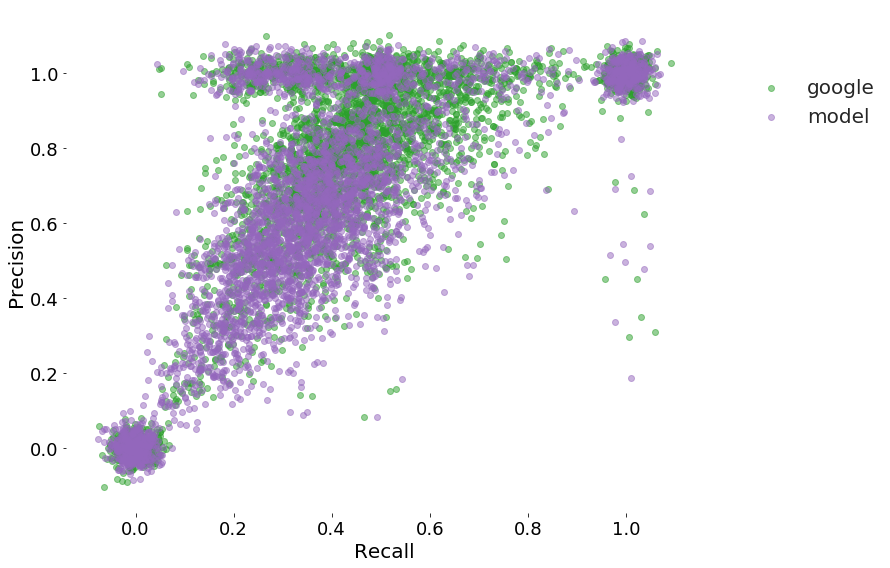

In [62]:
fig, ax = plt.subplots(figsize=(10,8))
sns.set_style("darkgrid")

x_vals = np.array(list(google_prec_recall['recall'].values()))
y_vals = np.array(list(google_prec_recall['precision'].values()))

plt.scatter(rand_jitter(x_vals), rand_jitter(y_vals), c=[tableau20[4]], label='google', alpha=0.5)

x_vals = np.array(list(model_prec_recall['recall'].values()))
y_vals = np.array(list(model_prec_recall['precision'].values()))

plt.scatter(rand_jitter(x_vals), rand_jitter(y_vals), c=[tableau20[8]], label='model', alpha=0.5)

plt.xlabel("Recall", size=20)
plt.ylabel("Precision", size=20)

plt.yticks(rotation=0, size=18)
plt.xticks(rotation=0, size=18)        


ax.legend(loc='upper right', bbox_to_anchor=(1.3, 0.9),
                      ncol=1, fancybox=True, shadow=True, fontsize=20)

sns.despine(left=True, bottom=True)

fig.tight_layout()




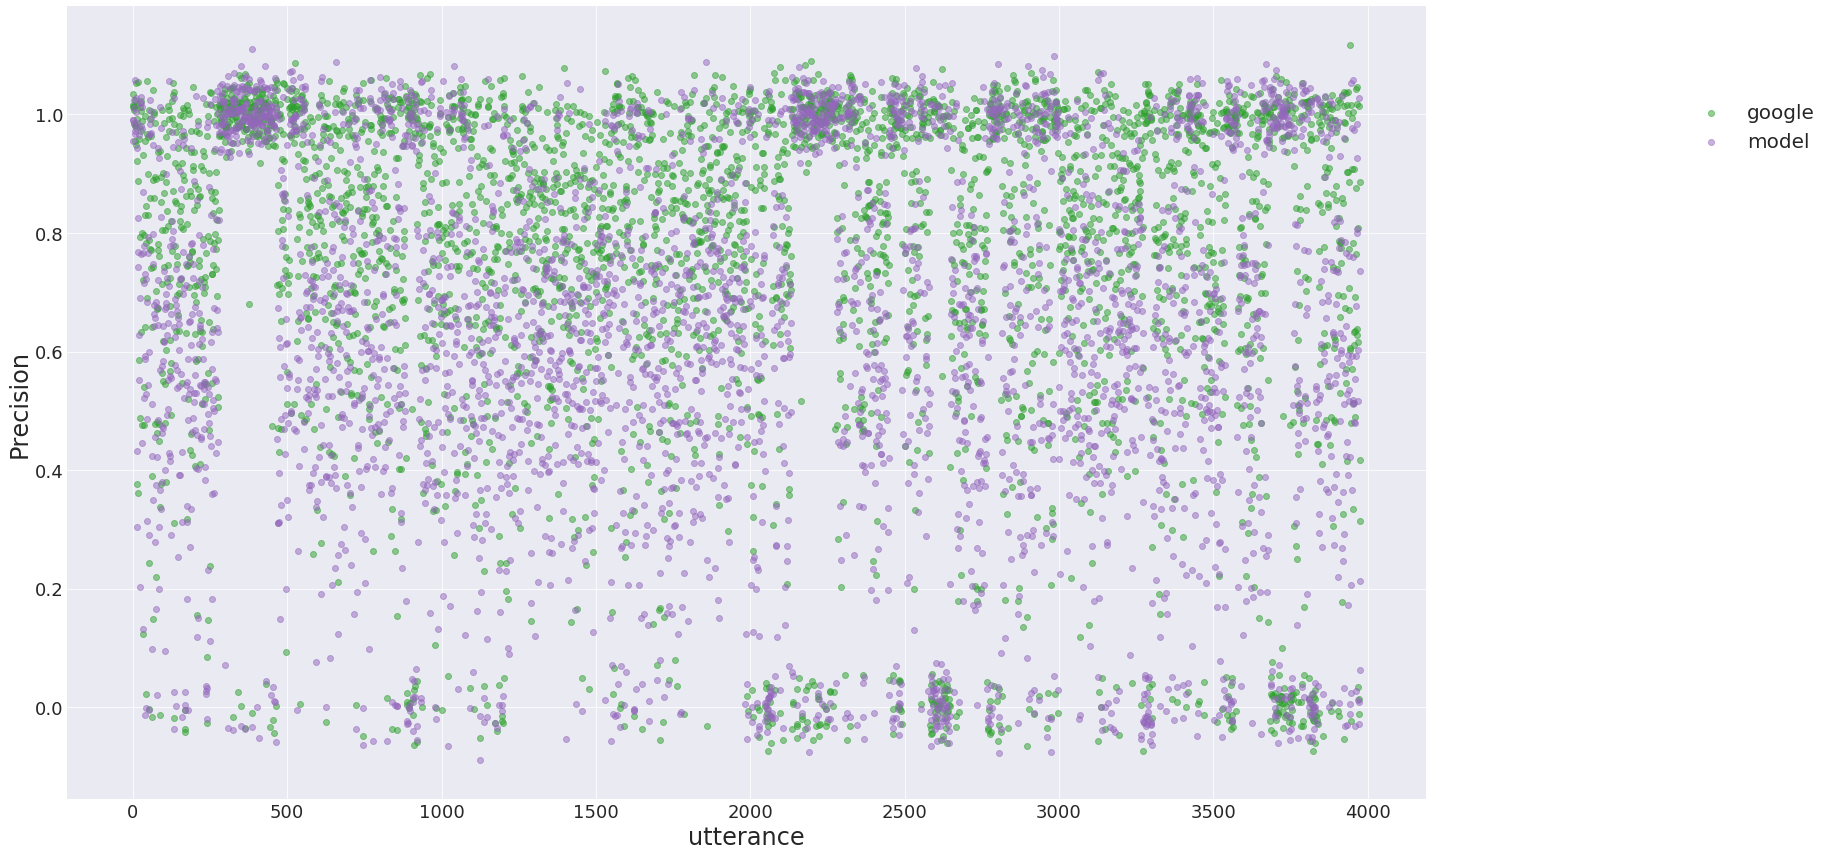

In [63]:
fig, ax = plt.subplots(figsize=(20,12))
sns.set_style("darkgrid")

google_vals = np.array(list(google_prec_recall['precision'].values()))
model_vals = np.array(list(model_prec_recall['precision'].values()))
x_vals = np.arange(0,len(model_prec_recall['precision']))

plt.scatter(x_vals, rand_jitter(google_vals), c=[tableau20[4]], label='google', alpha=0.5)

plt.scatter(x_vals, rand_jitter(model_vals), c=[tableau20[8]], label='model', alpha=0.5)

plt.xlabel("utterance", size=24)
plt.ylabel("Precision", size=24)

plt.yticks(rotation=0, size=18)
plt.xticks(rotation=0, size=18)        


ax.legend(loc='upper right', bbox_to_anchor=(1.3, 0.9),
                      ncol=1, fancybox=True, shadow=True, fontsize=20)

sns.despine(left=True, bottom=True)

fig.tight_layout()




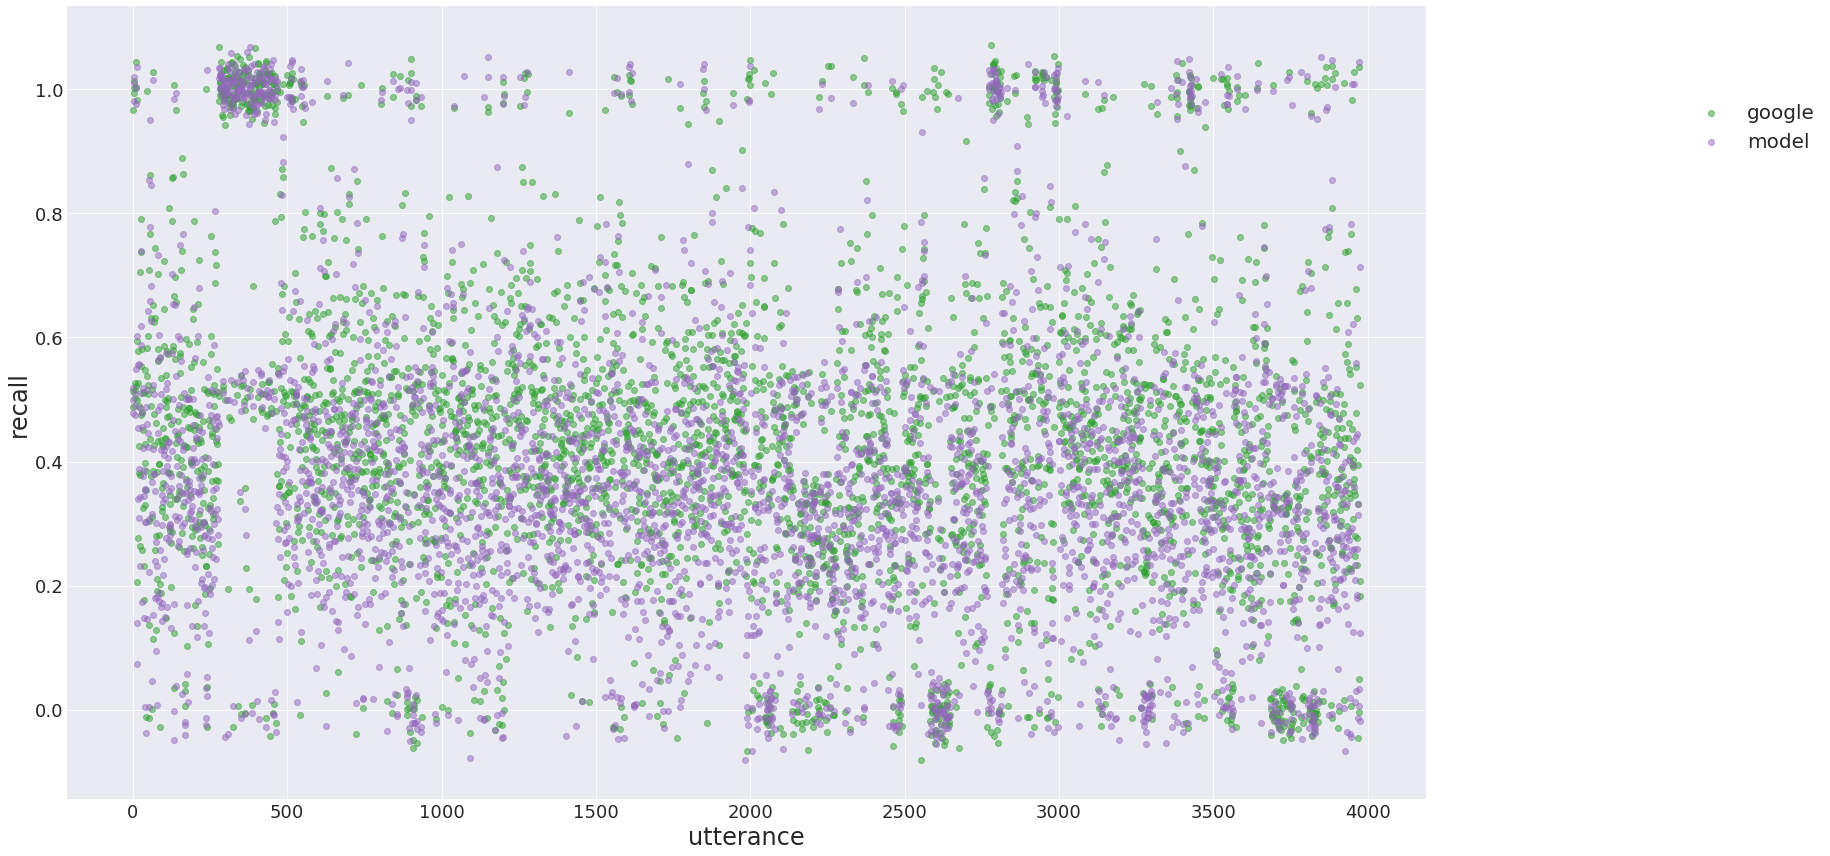

In [64]:
fig, ax = plt.subplots(figsize=(20,12))
sns.set_style("darkgrid")

google_vals = np.array(list(google_prec_recall['recall'].values()))
model_vals = np.array(list(model_prec_recall['recall'].values()))
x_vals = np.arange(0,len(model_prec_recall['recall']))

plt.scatter(x_vals, rand_jitter(google_vals), c=[tableau20[4]], label='google', alpha=0.5)

plt.scatter(x_vals, rand_jitter(model_vals), c=[tableau20[8]], label='model', alpha=0.5)

plt.xlabel("utterance", size=24)
plt.ylabel("recall", size=24)

plt.yticks(rotation=0, size=18)
plt.xticks(rotation=0, size=18)        


ax.legend(loc='upper right', bbox_to_anchor=(1.3, 0.9),
                      ncol=1, fancybox=True, shadow=True, fontsize=20)

sns.despine(left=True, bottom=True)

fig.tight_layout()




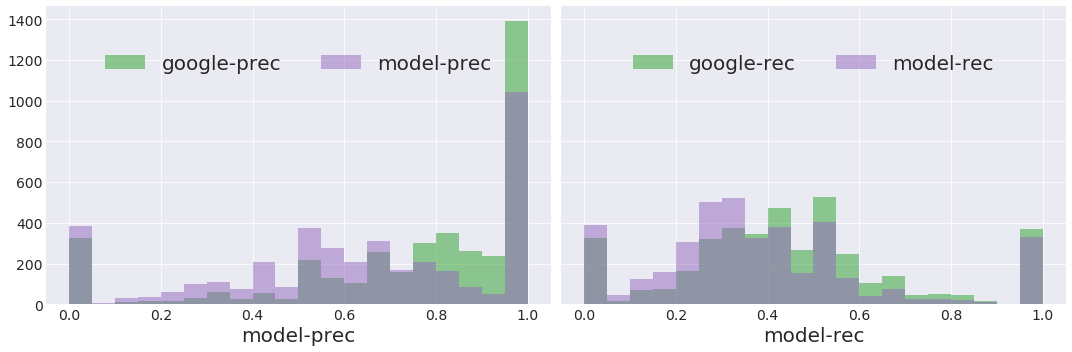

In [65]:
fig, ax = plt.subplots(figsize=(15,5),nrows=1, ncols=2, sharey=True)
sns.set_style("darkgrid")

hist_vals = [
    (np.array(list(google_prec_recall['precision'].values())), 'google-prec', tableau20[4]),
    (np.array(list(google_prec_recall['recall'].values())), 'google-rec', tableau20[4]),
    (np.array(list(model_prec_recall['precision'].values())), 'model-prec', tableau20[8]),
    (np.array(list(model_prec_recall['recall'].values())), 'model-rec', tableau20[8]),
]

for i, (vals, lbl, c) in enumerate(hist_vals):
    curr_ax = ax[i%2]
    curr_ax.hist(vals, label=lbl, color=c, alpha=0.5, bins=20)

    curr_ax.set_xlabel(lbl, size=20)
    for i in curr_ax.get_xticklabels()+curr_ax.get_yticklabels():
        i.set_fontsize(14) 
#     curr_ax.set_yticks(size=18)
#     curr_ax.set_xticks(size=18)        


ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, 0.9),
                      ncol=4, fancybox=True, shadow=True, fontsize=20)

ax[1].legend(loc='upper center', bbox_to_anchor=(0.5, 0.9),
                      ncol=4, fancybox=True, shadow=True, fontsize=20)


sns.despine(left=True, bottom=True)

fig.tight_layout()
fig.savefig(filename="prec_recall.png", dpi=200)

In [66]:
def check_better_metrics(metrics_1, metrics_2, preds_1, preds_2, factor, fname, m_dict):
    out_fname = "{0:s}_factor-{1:.2f}.txt".format(fname, factor)
    
    better_utts = []
    
    with open(out_fname, "w") as out_f:
        for utt_id in metrics_1:
            if (metrics_1[utt_id] >= (factor * metrics_2[utt_id])) and metrics_1[utt_id] > 0:
                ref_line = " ||| ".join([" ".join([w.decode() for w in m_dict[utt_id]['en_w'][i]]) for i in range(4)][:1])
                pred_1 = " ".join(preds_1[utt_id])
                pred_2 = " ".join(preds_2[utt_id])
                out_line = "{0:s}---{1:s}---{2:s}---{3:.3f}---{4:s}---{5:.3f}\n".format(utt_id, 
                                                                                        ref_line,
                                                                                        pred_1,
                                                                                        metrics_1[utt_id], 
                                                                                        pred_2,
                                                                                        metrics_2[utt_id])
                out_f.write(out_line)
                better_utts.append(utt_id)
            # end if
        # end for
    # end with
    print("Writing to file - {0:s}".format(out_fname))
    !wc $out_fname
    return sorted([u.rsplit('-',1)[0] for u in better_utts])

In [67]:
factor = 3

better_utts_prec_model = check_better_metrics(model_prec_recall['precision'], 
                         google_prec_recall['precision'], 
                         model_predictions, 
                         google_s2t_hyps['fisher_dev_r0'],
                         factor=factor, 
                         fname="model-google-prec", 
                         m_dict=m_dict)

better_utts_rec_model = check_better_metrics(model_prec_recall['recall'], 
                         google_prec_recall['recall'], 
                         model_predictions, 
                         google_s2t_hyps['fisher_dev_r0'],
                         factor=factor, 
                         fname="model-google-rec", 
                         m_dict=m_dict)

better_utts_prec_google = check_better_metrics(google_prec_recall['precision'], 
                         model_prec_recall['precision'], 
                         google_s2t_hyps['fisher_dev_r0'],
                         model_predictions, 
                         factor=factor, 
                         fname="google-model-prec", 
                         m_dict=m_dict)

better_utts_rec_google = check_better_metrics(google_prec_recall['recall'], 
                         model_prec_recall['recall'],
                         google_s2t_hyps['fisher_dev_r0'],
                         model_predictions, 
                         factor=factor, 
                         fname="google-model-rec", 
                         m_dict=m_dict)

Writing to file - model-google-prec_factor-3.00.txt
  124   747 10589 model-google-prec_factor-3.00.txt
Writing to file - model-google-rec_factor-3.00.txt
  127   880 11319 model-google-rec_factor-3.00.txt
Writing to file - google-model-prec_factor-3.00.txt
  271  3120 30262 google-model-prec_factor-3.00.txt
Writing to file - google-model-rec_factor-3.00.txt
  253  2304 25902 google-model-rec_factor-3.00.txt


In [68]:
len(set(better_utts_prec_model)), len(set(better_utts_rec_model)), len(set(better_utts_prec_google)), len(set(better_utts_rec_google))

(36, 36, 39, 39)

In [69]:
len(set(better_utts_rec_model) | set(better_utts_rec_google))

39

In [70]:
calls = []
for c in set(better_utts_rec_model) | set(better_utts_rec_google):
    calls.append(c)

better_utts_prec_model_counts = Counter(better_utts_prec_model)
better_utts_prec_model_counts = {c: better_utts_prec_model_counts.get(c, 0) for c in calls}

better_utts_rec_model_counts = Counter(better_utts_rec_model)
better_utts_rec_model_counts = {c: better_utts_rec_model_counts.get(c, 0) for c in calls}

better_utts_prec_google_counts = Counter(better_utts_prec_google)
better_utts_prec_google_counts = {c: better_utts_prec_google_counts.get(c, 0) for c in calls}

better_utts_rec_google_counts = Counter(better_utts_rec_google)
better_utts_rec_google_counts = {c: better_utts_rec_google_counts.get(c, 0) for c in calls}

In [71]:
 a, b = zip(*[("call_{0:02d}".format(i), better_utts_prec_google_counts[c]) for i, c in enumerate(calls)])

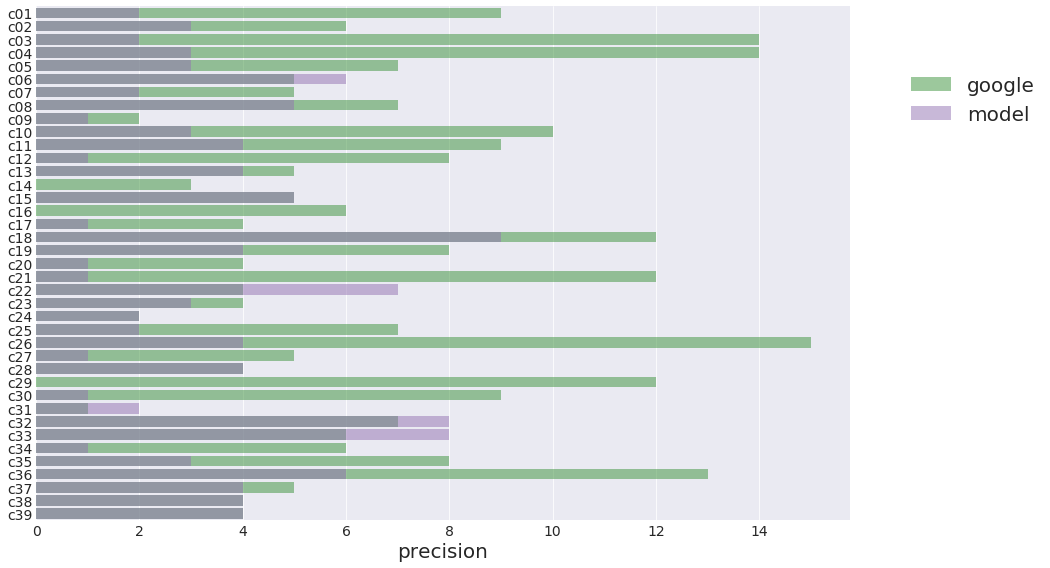

In [72]:
fig, ax = plt.subplots(figsize=(12,8),nrows=1, ncols=1)
sns.set_style("darkgrid")

x_vals, y1_vals = zip(*[("c{0:02d}".format(i+1), better_utts_prec_google_counts[c]) for i, c in enumerate(calls)])
x_vals, y2_vals = zip(*[("c{0:02d}".format(i+1), better_utts_prec_model_counts[c]) for i, c in enumerate(calls)])
ax = sns.barplot(x=list(y1_vals), y=list(x_vals), color=tableau20[4], **{"label":"google", "alpha":0.5}, ax=ax)
ax = sns.barplot(x=list(y2_vals), y=list(x_vals), color=tableau20[8], **{"label":"model", "alpha":0.5}, ax=ax)

ax.set_xlabel("precision", size=20)
for i in ax.get_xticklabels()+ax.get_yticklabels():
    i.set_fontsize(14) 

ax.legend(loc='upper right', bbox_to_anchor=(1.25, 0.9),
                      ncol=1, fancybox=True, shadow=True, fontsize=20)


sns.despine(left=True, bottom=True)

fig.tight_layout()
fig.savefig("prec_compare.png", dpi=200)

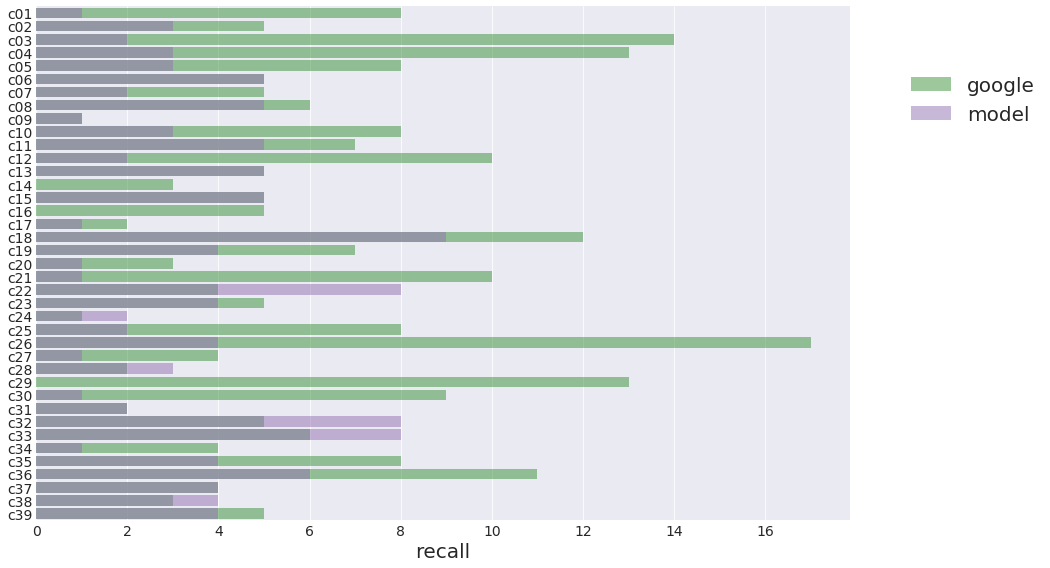

In [73]:
fig, ax = plt.subplots(figsize=(12,8),nrows=1, ncols=1)
sns.set_style("darkgrid")

x_vals, y1_vals = zip(*[("c{0:02d}".format(i+1), better_utts_rec_google_counts[c]) for i, c in enumerate(calls)])
x_vals, y2_vals = zip(*[("c{0:02d}".format(i+1), better_utts_rec_model_counts[c]) for i, c in enumerate(calls)])
ax = sns.barplot(x=list(y1_vals), y=list(x_vals), color=tableau20[4], **{"label":"google", "alpha":0.5}, ax=ax)
ax = sns.barplot(x=list(y2_vals), y=list(x_vals), color=tableau20[8], **{"label":"model", "alpha":0.5}, ax=ax)

ax.set_xlabel("recall", size=20)
for i in ax.get_xticklabels()+ax.get_yticklabels():
    i.set_fontsize(14) 

ax.legend(loc='upper right', bbox_to_anchor=(1.25, 0.9),
                      ncol=1, fancybox=True, shadow=True, fontsize=20)


sns.despine(left=True, bottom=True)

fig.tight_layout()
fig.savefig("rec_compare.png", dpi=200)

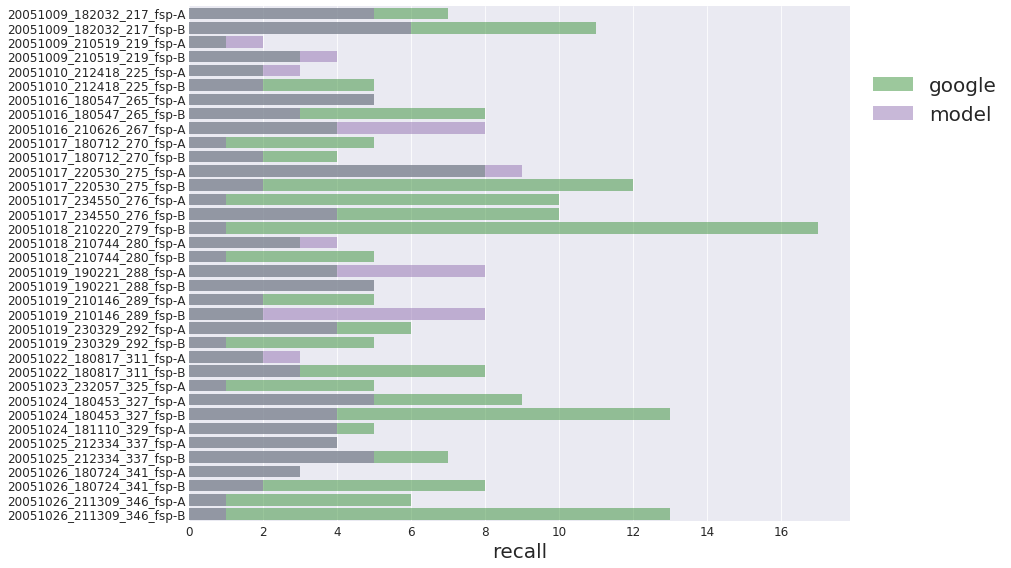

In [74]:
fig, ax = plt.subplots(figsize=(12,8),nrows=1, ncols=1)
sns.set_style("darkgrid")

ax = sns.countplot(y=better_utts_rec_google, color=tableau20[4], **{"label":"google", "alpha":0.5}, ax=ax)
ax = sns.countplot(y=better_utts_rec_model, color=tableau20[8], **{"label":"model", "alpha":0.5}, ax=ax)

ax.set_xlabel("recall", size=20)
for i in ax.get_xticklabels()+ax.get_yticklabels():
    i.set_fontsize(12) 

ax.legend(loc='upper right', bbox_to_anchor=(1.25, 0.9),
                      ncol=1, fancybox=True, shadow=True, fontsize=20)


sns.despine(left=True, bottom=True)

fig.tight_layout()

### word level analysis

In [75]:
top_k = 100
min_word_len = 1

In [76]:
stop_words = set(nltk.corpus.stopwords.words("english"))
len(stop_words)

127

In [77]:
def get_words(m_dict):
    words = []
    for u in m_dict:
        if type(m_dict[u]['en_w']) == list:
            words.extend([w.decode() for w in m_dict[u]['en_w']])
        else:
            for ref in m_dict[u]['en_w']:
                words.extend([w.decode() for w in ref])
    return Counter(words)
        

In [78]:
# words in train
train_words = get_words(map_dict['fisher_train'])
train_words_top_k = [(w,f) for w, f in sorted(train_words.items(), reverse=True, key=lambda t:t[1]) 
                     if w not in stop_words and len(w) >= min_word_len][:top_k]

train_only_words = set(train_words.keys())

print("{0:20s} | {1:10d}".format("# train word types", len(train_words)))
print("{0:20s} | {1:10d}".format("# train word tokens", sum(train_words.values())))

# train word types   |      17374
# train word tokens  |    1554177


In [79]:
train_words_top_k[:5]

[("'", 55741),
 ('yes', 35068),
 ('like', 14349),
 ('well', 12364),
 ('know', 10621)]

In [80]:
[(w,f) for w,f in train_words_top_k if "'" in w]

[("'", 55741)]

In [81]:
dev_words = get_words(map_dict['fisher_dev'])
dev_words_top_k = [(w,f) for w, f in sorted(dev_words.items(), reverse=True, key=lambda t:t[1]) 
                     if w not in stop_words and len(w) >= min_word_len][:top_k]

dev_only_words = set(dev_words.keys())

In [82]:
dev_words_top_k[:5]

[("'", 4820), ('yes', 3670), ('like', 1829), ('know', 1298), ('oh', 1230)]

In [83]:
oov_words = {w:f for w,f in dev_words.items() if w not in train_only_words}

In [84]:
print("{0:20s} | {1:10d}".format("# dev word types", len(dev_only_words)))
print("{0:20s} | {1:10d}".format("# dev word tokens", sum(dev_words.values())))

print("{0:20s} | {1:10d}".format("# oov word types", len(oov_words)))
print("{0:20s} | {1:10d}".format("# oov word tokens", sum(oov_words.values())))


# dev word types     |       4674
# dev word tokens    |     170346
# oov word types     |        874
# oov word tokens    |       1434


In [85]:
"{0:.1f}%".format(sum(oov_words.values()) / sum(dev_words.values()) * 100)

'0.8%'

Look at utterances which our model is doing better at, and compare to Google.

Are we doing better on a few calls only? Is there any particular speaker or call messing up our results?

In [86]:
crises_lex_fname = "../../criseslex/CrisisLexLexicon/CrisisLexRec.txt"
train_text_fname= "../../installs/fisher-callhome-corpus/corpus/ldc/fisher_train.en"

In [87]:
crises_words = []
crises_terms = []
with open(crises_lex_fname, "r") as in_f:
    for line in in_f:
        crises_words.extend(line.strip().split())
        crises_terms.append(line.strip())
    # end for
# end with
print(len(crises_words), len(crises_terms))

674 380


In [88]:
with open(train_text_fname, "r") as in_f:
    train_text = in_f.read().lower()

In [89]:
crises_words = list(set(crises_words))
crises_terms = list(set(crises_terms))
print(len(crises_words), len(crises_terms))

288 379


In [90]:
crisis_in_train = list(set(crises_words) & set(train_only_words))
crisis_in_dev = list(set(crises_words) & set(dev_only_words))

In [91]:
len(crisis_in_train), len(crisis_in_dev)

(230, 123)

In [92]:
crisis_in_train[:5]

['identified', 'visiting', 'homes', 'rebuild', 'warning']

In [93]:
'facing' in train_only_words

True

In [94]:
'prayers' in train_text

True

In [192]:
def search_terms_in_set(terms, text):
    terms_found = []
    for w in tqdm(terms):
        # stem_w = stem(w.lower())
        if stem(w.lower()) in text:
            occ = text.count(w.lower())
            terms_found.append((w, occ))
        # end if
    # end for
    return terms_found

In [193]:
crises_terms_found_train = search_terms_in_set(crises_terms, train_text)
crises_words_found_train = search_terms_in_set(crises_words, train_text)

100%|██████████| 288/288 [00:02<00:00, 108.02it/s]


In [194]:
len(crises_terms_found_train), len(crises_words_found_train)

(74, 254)

In [195]:
dev_text_fnames = ["../../installs/fisher-callhome-corpus/corpus/ldc/fisher_dev.en.0",
                "../../installs/fisher-callhome-corpus/corpus/ldc/fisher_dev.en.1",
                "../../installs/fisher-callhome-corpus/corpus/ldc/fisher_dev.en.2",
                "../../installs/fisher-callhome-corpus/corpus/ldc/fisher_dev.en.3",]

dev_texts = []


for dev_text_fname in dev_text_fnames:
    with open(dev_text_fname, "r") as in_f:
        dev_texts.append(in_f.read().lower())
    # end with open
# end for

In [196]:
terms_found_dev = []
for dev_text in dev_texts:
    terms_found_dev.append(search_terms_in_set(crises_terms, dev_text))

for curr_dev in terms_found_dev:
    print(len(curr_dev))

all_dev_terms_found = {}
for dev_set in terms_found_dev:
    for t, c in dev_set:
        if t not in all_dev_terms_found:
            all_dev_terms_found[t] = 0
        all_dev_terms_found[t] += c

print(all_dev_terms_found, len(all_dev_terms_found))

100%|██████████| 379/379 [00:00<00:00, 3318.62it/s]

20
23
23
25
{'praying': 0, 'people died': 4, 'investigation': 1, 'attack': 8, 'nursing': 1, 'levy': 0, 'bombing': 0, 'terror': 9, 'girl died': 0, 'responders': 0, 'emergency': 3, 'residents': 1, 'displaced': 0, 'damage': 7, 'affected': 1, 'death': 16, 'stream': 3, 'surviving': 0, 'events': 0, 'imminent': 0, 'warning': 0, 'terrifying': 0, 'disaster': 2, 'dead': 4, 'deadly': 0, 'soldier': 2, 'police officer': 2, 'relief': 1, 'want help': 1} 29


In [277]:
crises_words_found_dev = []
for dev_text in dev_texts:
    crises_words_found_dev.append(search_terms_in_set(crises_words, dev_text))

for curr_dev in crises_words_found_dev:
    print(len(curr_dev))

all_dev_crises_words_found = {}
for dev_set in crises_words_found_dev:
    for t, c in dev_set:
        if t not in all_dev_crises_words_found:
            all_dev_crises_words_found[t] = 0
        all_dev_crises_words_found[t] += c

print(all_dev_crises_words_found, len(all_dev_crises_words_found))

100%|██████████| 288/288 [00:00<00:00, 2910.71it/s]

149
157
163
159
{'visiting': 2, 'homes': 0, 'please': 17, 'watch': 69, 'large': 18, 'life': 96, 'releases': 0, 'stay': 83, 'change': 99, 'city': 178, 'remember': 82, 'peak': 127, 'deaths': 1, 'people': 756, 'teenager': 8, 'leave': 56, 'women': 28, 'government': 36, 'witnesses': 4, 'legs': 5, 'million': 8, 'following': 5, 'another': 118, 'someone': 116, 'ripped': 0, 'opposed': 0, 'coast': 11, 'make': 144, 'need': 137, 'threat': 5, 'crowd': 1, 'levy': 0, 'shot': 4, 'damage': 7, 'help': 194, 'dying': 35, 'assist': 31, 'affected': 1, 'praying': 0, 'path': 1, 'accepting': 0, 'tonight': 7, 'public': 20, 'water': 20, 'home': 87, 'river': 13, 'terrible': 31, 'live': 420, 'safe': 35, 'images': 0, 'reported': 2, 'years': 238, 'families': 2, 'kill': 54, 'amazing': 0, 'girl': 127, 'bombing': 0, 'reportedly': 0, 'pinned': 0, 'responders': 0, 'counts': 5, 'kills': 8, 'death': 16, 'time': 696, 'release': 4, 'daring': 0, 'medical': 4, 'stream': 3, 'major': 17, 'killed': 15, 'huge': 20, 'breaking': 0, 

In [278]:
topics_fname = "../../criseslex/fsp06_topics_in_english.txt"

In [279]:
topics = [
    "peace",
    "Music",
    "Marriage",
    "Religion",
    "Cell phones",
    "Dating",
    "Telemarketing and SPAM",
    "Politics",
    "Travel",
    "Technical devices",
    "Healthcare",
    "Advertisements",
    "Power",
    "Occupations",
    "Movies",
    "Welfare",
    "Breaking up",
    "Location",
    "Justice",
    "Memories",
    "Crime",
    "Violence against women",
    "Equality",
    "Housing",
    "Immigration",
    # new topics
    "Interracial",
    "Christians",
    "muslims",
    "jews",
    "email",
    "phone",
    "democracy",
    "Democratic",
    "Republican",
    "technology",
    "leadership",
    "community",
    "jury",
    "police",
    "inequality",
    "renting",
    "Violence",
    "immigrants",
    "immigrant",
    "skilled",
    "Telemarketing",
    "SPAM",
    "skill",
    "job",
    "health",
    "mobile",
    "ads",
    "physical",
    "emotional",
    "bubble",
    "rent",
    "economy",
    "abuse",
    "women",
    "city",
    "country",
    "suburban",
    "dollar",
    "united states",
    "laws",
    "phone",
    "race",
    "biracial",
    "interracial",
    "marriage",
    "lyrics",
    "sexuality",
    "health",
    "television",
    "european",
    "community",
    "protect",
    "spouse"
]

topics = [t.lower() for t in topics]
topics_stem = [stem(t) for t in topics]

In [280]:
dev_words_stem = {}
for w in dev_words:
    stem_w = stem(w)
    if stem_w not in dev_words_stem:
        dev_words_stem[stem_w] = 0
    dev_words_stem[stem_w] += dev_words[w]
# end for

In [321]:
len(topics)

78

In [322]:
prune_topics = [t for t in topics if dev_words_stem.get(stem(t),0) > 5 and dev_words_stem.get(stem(t),0) < 50]
len(prune_topics)

33

In [333]:
random.seed("selec_query_terms")
sel_topics = random.sample(prune_topics, min(len(prune_topics), 50))

In [334]:
train_topics_found = search_terms_in_set(sel_topics, train_text)
print(len(train_topics_found))

100%|██████████| 33/33 [00:00<00:00, 104.58it/s]

33


In [335]:
dev_topics_found = []
for dev_text in dev_texts:
    ret = search_terms_in_set(sel_topics, dev_text)
    dev_topics_found.append(ret)

for curr_dev in dev_topics_found:
    print(len(curr_dev))

100%|██████████| 33/33 [00:00<00:00, 2276.14it/s]

32
32
32
32


In [336]:
import json

In [337]:
sel_crises_words_fname = "../../criseslex/selected_crises_words.json"
sel_topics_fname = "../../criseslex/selected_topics.json"
    
with open(sel_crises_words_fname, "w") as out_f:
    json.dump(crises_words, out_f, indent=4)
    
with open(sel_topics_fname, "w") as out_f:
    json.dump(sel_topics, out_f, indent=4)

In [338]:
def find_all_terms_references(utt_text, terms):
    terms_set = set([stem(i) for i in terms])
    terms_search_res = {}
    full_words = {}

    for u in tqdm(utt_text, ncols=80):
        l = (utt_text[u]['en_w'] if type(utt_text[u]) == dict 
             else utt_text[u])
        for r in l:
            for w in set(r):
                decoded_w = w.decode() if type(w) != str else w
                w_to_search = stem(decoded_w)
                if w_to_search in terms_set:
                    if w_to_search not in terms_search_res:
                        terms_search_res[w_to_search] = set()
                        full_words[w_to_search] = set()
                    terms_search_res[w_to_search].add(u)
                    full_words[w_to_search].add(decoded_w)
                # end if found
            # end for current reference
        # end for all references
    # end for all utterances
    return terms_search_res, full_words


def find_all_terms_predictions(utt_text, terms):
    terms_set = set([stem(i) for i in terms])
    terms_search_res = {}
    full_words = {}

    for u in tqdm(utt_text, ncols=80):
        r = utt_text[u]
        for w in set(r):
            w_to_search = stem(w)
            if w_to_search in terms_set:
                if w_to_search not in terms_search_res:
                    terms_search_res[w_to_search] = set()
                    full_words[w_to_search] = set()
                terms_search_res[w_to_search].add(u)
                full_words[w_to_search].add(u)
                # end if found
            # end for current reference
    # end for all utterances
    return terms_search_res, full_words

In [355]:
def terms_prec_recall(preds, refs):
    prec_recall = {}
    prec_recall = {'t':0, 'tp':0, 'tc':0, 'terms':{}}
    for term in refs.keys():
        prec_recall['terms'][term] = {}
        prec_recall['terms'][term]['t'] = len(refs[term])
        preds_occ = preds.get(term, set())
        prec_recall['terms'][term]['tp'] = len(preds_occ)
        prec_recall['terms'][term]['tc'] = len(refs[term] & preds_occ)
        prec_recall['t'] += prec_recall['terms'][term]['t']
        prec_recall['tp'] += prec_recall['terms'][term]['tp']
        prec_recall['tc'] += prec_recall['terms'][term]['tc']
    # end for each term
    return prec_recall

### Topics

In [356]:
ref_topics, ref_topic_labels = find_all_terms_references(map_dict['fisher_dev'], sel_topics)
ref_topics_google, ref_topics_labels_google = find_all_terms_references(google_refs, sel_topics)

pred_topics, pred_topics_topics_labels = find_all_terms_predictions(model_predictions, sel_topics)
pred_topics_google, pred_topics_labels_google = find_all_terms_predictions(google_hyps, sel_topics)

100%|█████████████████████████████████████| 3977/3977 [00:01<00:00, 2626.11it/s]


In [357]:
len(ref_topics), len(pred_topics), len(ref_topics_google), len(pred_topics_google)

(26, 26, 26, 25)

In [358]:
model_topics_p_r = terms_prec_recall(preds = pred_topics, refs = ref_topics)
google_topics_p_r = terms_prec_recall(preds = pred_topics_google, refs = ref_topics_google)

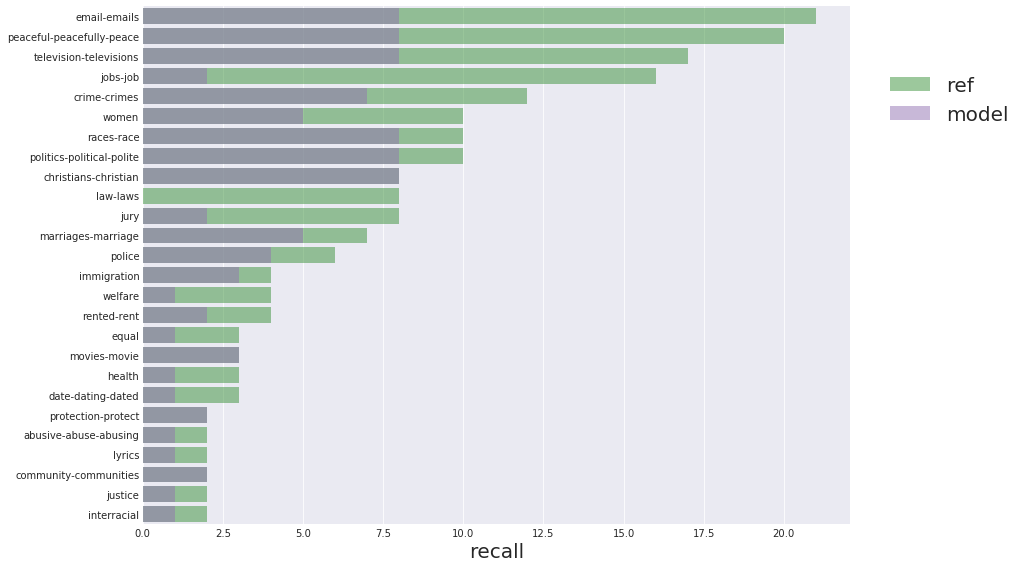

In [360]:
fig, ax = plt.subplots(figsize=(12,8),nrows=1, ncols=1)
sns.set_style("darkgrid")

term_vals = [t[0] for t in sorted(model_topics_p_r['terms'].items(), reverse=True, key=lambda t: t[1]['t'])][:50]
count_vals_ref = [model_topics_p_r['terms'][t]['t'] for t in term_vals]
count_vals_hyp = [model_topics_p_r['terms'][t]['tc'] for t in term_vals]

term_labels = ["-".join(list(ref_topic_labels[t])[:3]) for t in term_vals]

ax = sns.barplot(x=count_vals_ref, 
                 y=term_labels, 
                 color=tableau20[4], **{"label":"ref", "alpha":0.5}, ax=ax)
ax = sns.barplot(x=count_vals_hyp, 
                 y=term_labels, 
                 color=tableau20[8], **{"label":"model", "alpha":0.5}, ax=ax)

ax.set_xlabel("recall", size=20)
for i in ax.get_xticklabels()+ax.get_yticklabels():
    i.set_fontsize(10) 

ax.legend(loc='upper right', bbox_to_anchor=(1.25, 0.9),
                      ncol=1, fancybox=True, shadow=True, fontsize=20)

sns.despine(left=True, bottom=True)

fig.tight_layout()

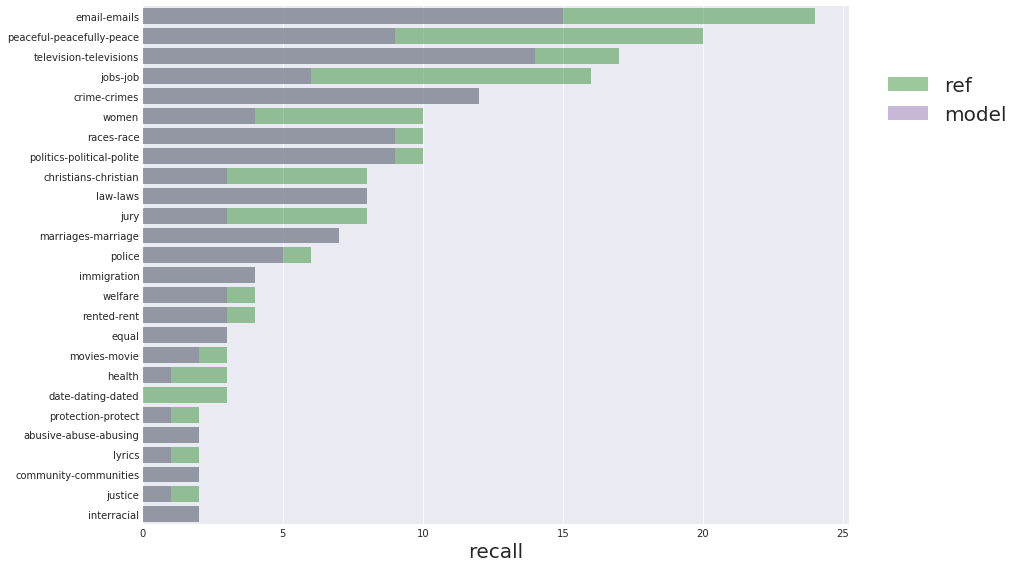

In [361]:
fig, ax = plt.subplots(figsize=(12,8),nrows=1, ncols=1)
sns.set_style("darkgrid")

term_vals = [t[0] for t in sorted(google_topics_p_r['terms'].items(), reverse=True, key=lambda t: t[1]['t'])][:50]
count_vals_ref = [google_topics_p_r['terms'][t]['t'] for t in term_vals]
count_vals_hyp = [google_topics_p_r['terms'][t]['tc'] for t in term_vals]

ax = sns.barplot(x=count_vals_ref, 
                 y=term_labels, 
                 color=tableau20[4], **{"label":"ref", "alpha":0.5}, ax=ax)
ax = sns.barplot(x=count_vals_hyp, 
                 y=term_labels, 
                 color=tableau20[8], **{"label":"model", "alpha":0.5}, ax=ax)

ax.set_xlabel("recall", size=20)
for i in ax.get_xticklabels()+ax.get_yticklabels():
    i.set_fontsize(10) 

ax.legend(loc='upper right', bbox_to_anchor=(1.25, 0.9),
                      ncol=1, fancybox=True, shadow=True, fontsize=20)

sns.despine(left=True, bottom=True)

fig.tight_layout()

In [362]:
model_topics_p_r, 

({'t': 189,
  'tc': 93,
  'terms': {'abus': {'t': 2, 'tc': 1, 'tp': 2},
   'christian': {'t': 8, 'tc': 8, 'tp': 11},
   'communiti': {'t': 2, 'tc': 2, 'tp': 2},
   'crime': {'t': 12, 'tc': 7, 'tp': 7},
   'date': {'t': 3, 'tc': 1, 'tp': 4},
   'email': {'t': 21, 'tc': 8, 'tp': 13},
   'equal': {'t': 3, 'tc': 1, 'tp': 1},
   'health': {'t': 3, 'tc': 1, 'tp': 4},
   'immigr': {'t': 4, 'tc': 3, 'tp': 4},
   'interraci': {'t': 2, 'tc': 1, 'tp': 2},
   'job': {'t': 16, 'tc': 2, 'tp': 9},
   'juri': {'t': 8, 'tc': 2, 'tp': 6},
   'justic': {'t': 2, 'tc': 1, 'tp': 3},
   'law': {'t': 8, 'tc': 0, 'tp': 10},
   'lyric': {'t': 2, 'tc': 1, 'tp': 1},
   'marriag': {'t': 7, 'tc': 5, 'tp': 8},
   'movi': {'t': 3, 'tc': 3, 'tp': 10},
   'peac': {'t': 20, 'tc': 8, 'tp': 13},
   'polic': {'t': 6, 'tc': 4, 'tp': 7},
   'polit': {'t': 10, 'tc': 8, 'tp': 10},
   'protect': {'t': 2, 'tc': 2, 'tp': 2},
   'race': {'t': 10, 'tc': 8, 'tp': 14},
   'rent': {'t': 4, 'tc': 2, 'tp': 4},
   'televis': {'t': 17, 't

In [363]:
term_labels = ["-".join(list(ref_topic_labels[t])[:3]) for t in term_vals]
print(len(term_labels))
term_labels

26


['email-emails',
 'peaceful-peacefully-peace',
 'television-televisions',
 'jobs-job',
 'crime-crimes',
 'women',
 'races-race',
 'politics-political-polite',
 'jury',
 'christians-christian',
 'law-laws',
 'marriages-marriage',
 'police',
 'immigration',
 'welfare',
 'rented-rent',
 'movies-movie',
 'date-dating-dated',
 'health',
 'equal',
 'abusive-abuse-abusing',
 'interracial',
 'protection-protect',
 'community-communities',
 'lyrics',
 'justice']

In [368]:
model_topics_p_r['tc'] / model_topics_p_r['tp'], model_topics_p_r['tc'] / model_topics_p_r['t']

(0.5602409638554217, 0.49206349206349204)

In [369]:
google_topics_p_r['tc'] / google_topics_p_r['tp'], google_topics_p_r['tc'] / google_topics_p_r['t']

(0.7456647398843931, 0.671875)